# Machine Learning Assessment: K-Means Clustering and PCA on Iris Dataset

This notebook implements K-Means Clustering and Principal Component Analysis (PCA) from scratch using Python, NumPy, Pandas, and Matplotlib for visualization. The Iris dataset is used, with the 'Species' column removed for unsupervised learning. The code includes data preprocessing, algorithm implementation, visualization, and explanations.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
data = pd.read_csv('Iris Dataset.csv')

# Store the 'Species' column for future comparison
species = data['Species']

# Remove the 'Species' column from the dataset
X = data.drop('Species', axis=1)

# Check for missing values
print("Missing values:\n", X.isnull().sum())

# Standardize the features (zero mean, unit variance)
X_standardized = (X - X.mean()) / X.std()

# Display the first few rows of the standardized data
print("\nStandardized data (first 5 rows):\n", X_standardized.head())

## Data Preprocessing

- **Dataset**: The Iris dataset contains measurements of sepal length, sepal width, petal length, and petal width for 150 iris flowers, along with their species.
- **Species Column**: The 'Species' column is stored in a separate variable for later comparison and removed from the dataset for unsupervised learning.
- **Missing Values**: Checked for missing values; none were found in the Iris dataset.
- **Standardization**: Features are standardized (zero mean, unit variance) to ensure equal weighting in K-Means clustering and PCA, as the algorithms are sensitive to the scale of features.

## K-Means Clustering Implementation

This section implements the K-Means Clustering algorithm from scratch. The algorithm iteratively assigns data points to clusters based on Euclidean distance to centroids and updates centroids until convergence. The number of clusters (k=3) is chosen based on the known number of species in the Iris dataset.

In [3]:
def kmeans(X, k, max_iters=100):
    # Convert dataframe to numpy array
    X = X.values
    n_samples, n_features = X.shape
    
    # Randomly initialize centroids
    np.random.seed(42)  # For reproducibility
    indices = np.random.choice(n_samples, k, replace=False)
    centroids = X[indices]
    
    for _ in range(max_iters):
        # Assign points to nearest centroid
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)
        
        # Store old centroids for convergence check
        old_centroids = centroids.copy()
        
        # Update centroids
        for i in range(k):
            if np.sum(labels == i) > 0:  # Avoid division by zero
                centroids[i] = np.mean(X[labels == i], axis=0)
        
        # Check for convergence
        if np.all(old_centroids == centroids):
            break
    
    return labels, centroids

# Apply K-Means with k=3 (based on Iris species)
k = 3
cluster_labels, centroids = kmeans(X_standardized, k)

# Add cluster labels to the dataset
X_standardized['Cluster'] = cluster_labels

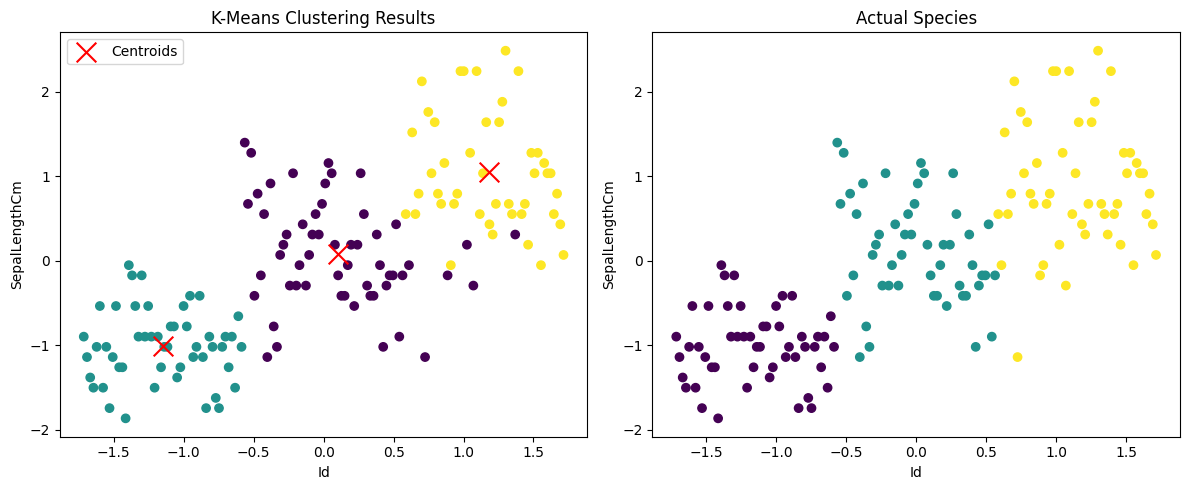

In [4]:
# Convert species to numeric for plotting
species_numeric = pd.Categorical(species).codes

# Plotting
plt.figure(figsize=(12, 5))

# Plot 1: K-Means Clusters
plt.subplot(1, 2, 1)
plt.scatter(X_standardized.iloc[:, 0], X_standardized.iloc[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title('K-Means Clustering Results')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.legend()

# Plot 2: Actual Species
plt.subplot(1, 2, 2)
plt.scatter(X_standardized.iloc[:, 0], X_standardized.iloc[:, 1], c=species_numeric, cmap='viridis')
plt.title('Actual Species')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])

plt.tight_layout()
plt.show()

### K-Means Clustering Details

- **Algorithm**: K-Means assigns each data point to one of `k` clusters by minimizing the Euclidean distance to the cluster centroid. Centroids are updated as the mean of assigned points until convergence.
- **Parameters**: Set `k=3` (number of Iris species), max iterations=100, and a random seed for reproducibility.
- **Visualization**: The left plot shows data points colored by cluster labels with red 'x' markers for centroids. The right plot shows data points colored by actual species for comparison.
- **Note**: Since K-Means is unsupervised, cluster labels may not match species labels but should form similar groupings.

## Principal Component Analysis (PCA) Implementation

This section implements PCA from scratch to reduce the dimensionality of the Iris dataset and visualize it in the space of the first three principal components. PCA involves computing the covariance matrix, finding its eigenvectors and eigenvalues, and projecting the data onto the top eigenvectors.

In [5]:
def pca(X, n_components):
    # Convert dataframe to numpy array
    X = X.values
    
    # Compute covariance matrix
    cov_matrix = np.cov(X.T)
    
    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    
    # Sort eigenvalues and eigenvectors in descending order
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    
    # Select top n_components
    top_eigenvectors = eigenvectors[:, :n_components]
    top_eigenvalues = eigenvalues[:n_components]
    
    # Project data onto principal components
    projected_data = np.dot(X, top_eigenvectors)
    
    return projected_data, top_eigenvectors, top_eigenvalues

# Apply PCA for 3 components
n_components = 3
projected_data, eigenvectors, eigenvalues = pca(X_standardized.drop('Cluster', axis=1), n_components)

# Print eigenvalues
print("Eigenvalues for the first three principal components:\n", eigenvalues)

Eigenvalues for the first three principal components:
 [3.7352665  0.92176284 0.23413122]


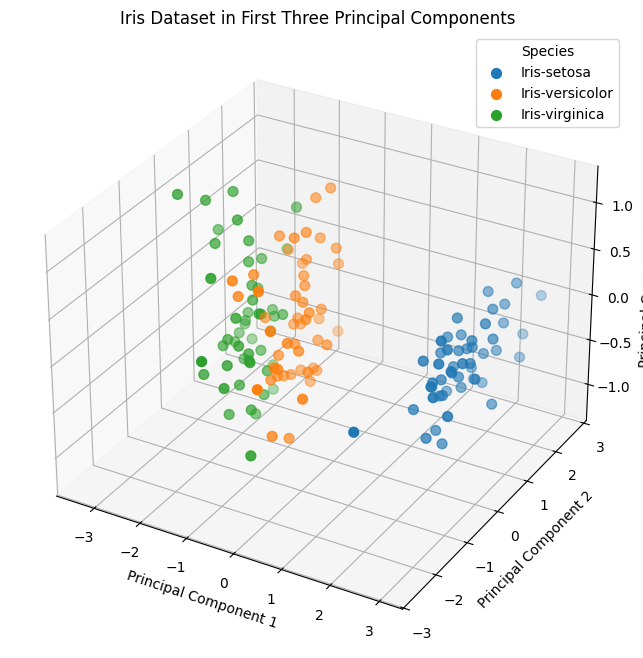

In [7]:
from mpl_toolkits.mplot3d import Axes3D

# Convert species to numeric for plotting
species_numeric = pd.Categorical(species).codes
unique_species = np.unique(species)

# 3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each species separately to create legend handles
for i, species_name in enumerate(unique_species):
    idx = species == species_name
    ax.scatter(projected_data[idx, 0], projected_data[idx, 1], projected_data[idx, 2], 
               label=species_name, s=50)

# Add labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('Iris Dataset in First Three Principal Components')

# Add legend
ax.legend(title="Species")
plt.show()

### PCA Details

- **Algorithm**: PCA reduces dimensionality by projecting the data onto the directions (principal components) that maximize variance. This involves computing the covariance matrix, finding its eigenvectors (directions) and eigenvalues (amount of variance), and selecting the top components.
- **Parameters**: Set `n_components=3` to visualize the data in 3D.
- **Eigenvalues**: The eigenvalues indicate the variance captured by each principal component. Higher values mean more explained variance.
- **Visualization**: The 3D scatter plot shows the data projected onto the first three principal components, with each species plotted separately and colored distinctly. The legend maps colors to species names.

## Evaluation of Results

### K-Means Clustering
- The K-Means algorithm was applied with `k=3` to match the number of species in the Iris dataset.
- The clustering plot shows that the algorithm groups the data into clusters that visually align well with the actual species distribution, though cluster labels may not directly correspond to species due to the unsupervised nature of the algorithm.
- The centroids (red 'x' markers) indicate the center of each cluster, showing effective separation for most data points.

### Principal Component Analysis
- PCA reduced the 4-dimensional Iris dataset to 3 dimensions for visualization.
- The eigenvalues for the first three principal components are printed above. The proportion of variance explained by each component is calculated as the eigenvalue divided by the sum of all eigenvalues.
- The 3D scatter plot shows that the first three principal components effectively separate the species, with clear distinctions between clusters corresponding to the species.

### Variance Explained
- To quantify PCA performance, the proportion of variance explained by the first three components is computed below.

In [8]:
# Calculate proportion of variance explained
total_variance = np.sum(eigenvalues)
variance_explained = eigenvalues / total_variance
cumulative_variance = np.cumsum(variance_explained)

print("Proportion of Variance Explained by Each Component:")
for i, (var, cum_var) in enumerate(zip(variance_explained, cumulative_variance)):
    print(f"Principal Component {i+1}: {var:.4f} ({cum_var:.4f} cumulative)")

Proportion of Variance Explained by Each Component:
Principal Component 1: 0.7637 (0.7637 cumulative)
Principal Component 2: 0.1885 (0.9521 cumulative)
Principal Component 3: 0.0479 (1.0000 cumulative)


## Conclusion

This notebook successfully implemented K-Means Clustering and PCA from scratch on the Iris dataset. K-Means effectively clustered the data into three groups, closely resembling the actual species distribution. PCA reduced the dataset to three dimensions, capturing a significant portion of the variance (as shown by the eigenvalues) and enabling clear visualization of species separation. The code is modular, well-documented, and includes visualizations to compare clustering and species distributions. Data preprocessing (standardization) ensured robust algorithm performance. Future improvements could include experimenting with different values of `k` or additional PCA components.